In [1]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

In [2]:
Gb=92
Ib=7.3
Xb=0.00
G0=258    
x_ext=0.000
y0 = [Gb+G0, Xb, Ib]
y_20 = [Gb+G0, Xb+x_ext, Ib]

In [3]:
t=np.linspace(0,360,361)

params=(0.03082,0.014,1.062e-5,0.3,100,0.003349)
p1,p2,p3,p4,p5,p6=params
params_2=(0.03082,0.014,1.062e-7,0.3,100,0.003349) #parameters of diabetic person

In [4]:
def odes(y,t,args=params):

    p1,p2,p3,p4,p5,p6=params
    
    G = y[0]
    X = y[1]
    I = y[2]
    
    
    dGdt = -(p1 + X)*G + (p1*Gb) 
    dXdt = -(p2*X) + p3*(I-Ib)
    dIdt = p6*(G-p5)*t - p4*(I-Ib) 
    if(G<p5):
        dIdt = -p4*(I-Ib)
                      
    return [dGdt,dXdt,dIdt]

In [5]:
def odes_2(y_2,t,args=params_2):

    p1,p2,p3,p4,p5,p6=params_2
    
    g = y_2[0]
    x = y_2[1]
    i = y_2[2]

    dgdt = -(p1 + x)*g + (p1*Gb)           
    dxdt = -(p2*x) + p3*(i-Ib)
    didt = p6*(g-p5)*t - p4*(i-Ib) 
    if(g<p5):
        didt = -p4*(i-Ib)
                  
    return [dgdt,dxdt,didt]

In [6]:
y=odeint(odes,y0,t)
y_2=odeint(odes_2,y_20,t)

In [7]:
G=y[:,0]
X=y[:,1]
I=y[:,2]
g=y_2[:,0]
x=y_2[:,1]
i=y_2[:,2]

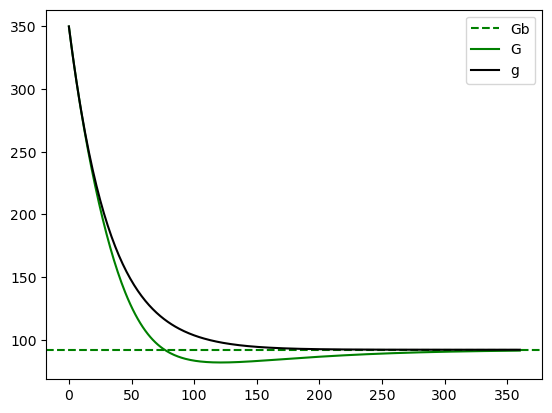

In [8]:
plt.axhline(y = Gb, color = 'g', linestyle = '--',label="Gb")
plt.plot(t,G,'g',label="G")
plt.plot(t,g,'k',label="g")
plt.legend()
plt.show()

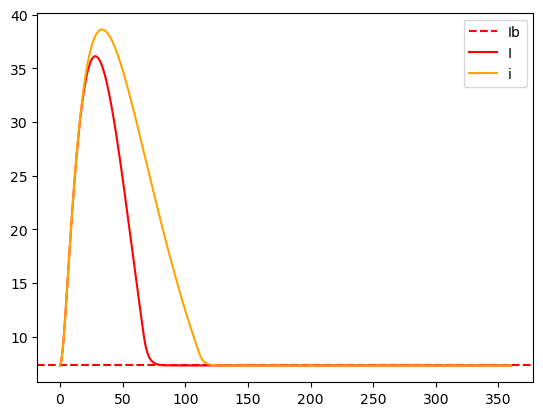

In [9]:
plt.axhline(y = Ib, color = 'r', linestyle = '--',label="Ib")
plt.plot(t,I,'r',label="I")
plt.plot(t,i,'orange',label="i")
plt.legend()
plt.show()

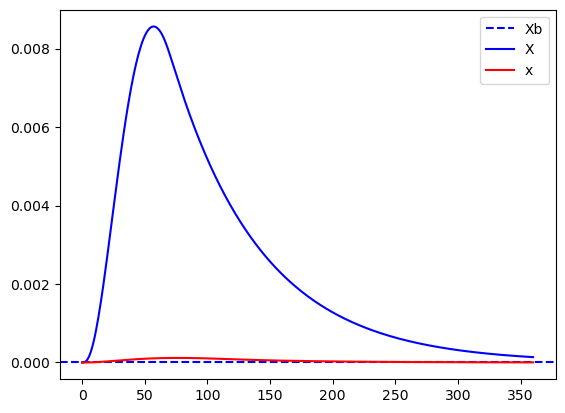

In [10]:
plt.axhline(y = Xb, color = 'b', linestyle = '--',label="Xb")
plt.plot(t,X,'b',label="X")
plt.plot(t,x,'r',label="x")
plt.legend()
plt.show()

In [11]:
I_max = np.amax(I)

phi_1 = (I_max - Ib)/(p4*(G0-Gb))
phi_2 = p6*(10**4)

SI=p3/p2
AIRg=phi_2

print(f'PHI_1 = {phi_1}\nPHI_2 = {phi_2}\nSI = {SI}\nAIRg = {AIRg}')
print(AIRg*SI)

NameError: name 'p4' is not defined

In [12]:
data_raw=np.array([#0, 92, 11,
0, 350, 26,
2  , 287, 130,
4  , 251, 85,
6  , 240, 51,
8  , 216, 49,
10 , 211, 45,
12 , 205, 41,
14 , 196, 35,
16 , 192, 30,
19 , 172, 30,
22 , 163, 27,
27 , 142, 30,
32 , 124, 22,
42 , 105, 15,
52 , 92, 15,
62 , 84, 11,
72 , 77, 10,
82 , 82, 8,
92 , 81, 11,
102, 82, 7,
122, 82, 8,
142, 85, 8,
162, 90, 7])

data = data_raw.reshape(23,3)

In [13]:
data_time=data[:,0]
data_glucose=data[:,1]
data_insulin=data[:,2]

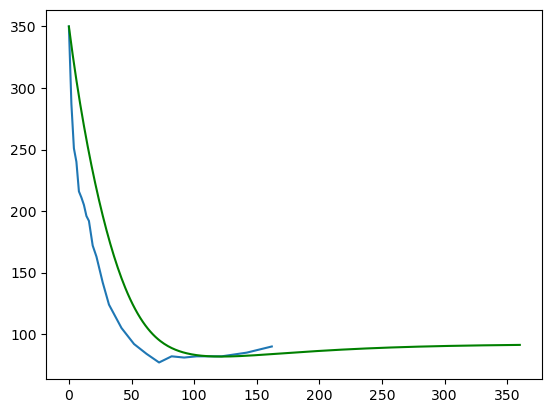

In [14]:
plt.plot(data_time,data_glucose)
plt.plot(t,G,'g',label="G")

In [15]:
def finding_basalTime(arr):
    for t_basal, val in enumerate(arr):
        if val<=92:
            return t_basal
            break

In [16]:
finding_basalTime(G)
finding_basalTime(g)

279

In [17]:
def ext_insulin():
    x_ext=0
    for iter in range(0,20):
        x_ext=x_ext+0.001
        y_20 = [Gb+G0, Xb+x_ext, Ib]
        y_2=odeint(odes_2,y_20,t)
        g=y_2[:,0]
        x=y_2[:,1]
        i=y_2[:,2]
        if finding_basalTime(g)<=finding_basalTime(G):
            return x_ext
            break

In [18]:
finding_basalTime(g)

279

In [19]:
ext_insulin()

0.012000000000000004

In [20]:
y_20 = [Gb+G0, Xb+ext_insulin(), Ib]
y_2=odeint(odes_2,y_20,t)
g=y_2[:,0]
x=y_2[:,1]
i=y_2[:,2]

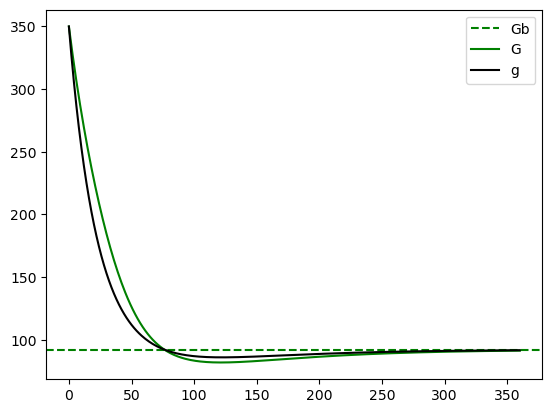

In [21]:
plt.axhline(y = Gb, color = 'g', linestyle = '--',label="Gb")
plt.plot(t,G,'g',label="G")
plt.plot(t,g,'k',label="g")
plt.legend()
plt.show()

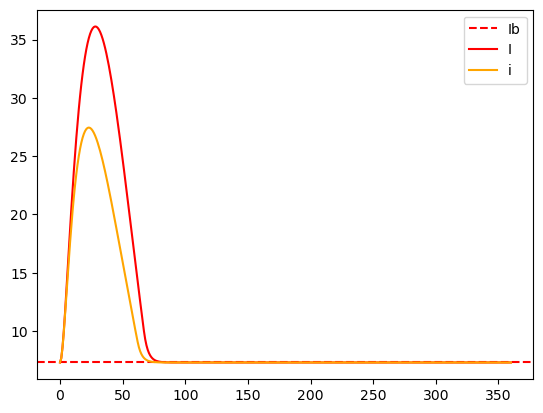

In [22]:
plt.axhline(y = Ib, color = 'r', linestyle = '--',label="Ib")
plt.plot(t,I,'r',label="I")
plt.plot(t,i,'orange',label="i")
plt.legend()
plt.show()

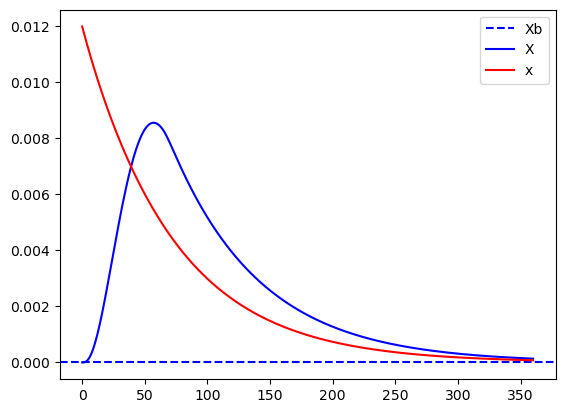

In [23]:
plt.axhline(y = Xb, color = 'b', linestyle = '--',label="Xb")
plt.plot(t,X,'b',label="X")
plt.plot(t,x,'r',label="x")
plt.legend()
plt.show()